# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# SKLEARN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


# Data Exploration

In [2]:
url = "raw_data/dropout-dataset.csv"
data = pd.read_csv(url)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


In [5]:
data.shape

(4424, 35)

In [6]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

### Question

Do we care about enrollment count?

In [7]:
data.corr()

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_33504/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.040255,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.060483,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.018276,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,0.026203,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.003293,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,-0.017785,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.012569,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880


# Data Cleaning

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# Data Visualization

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_33504/1096098517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,ax=ax,fmt='0.1')


<AxesSubplot:>

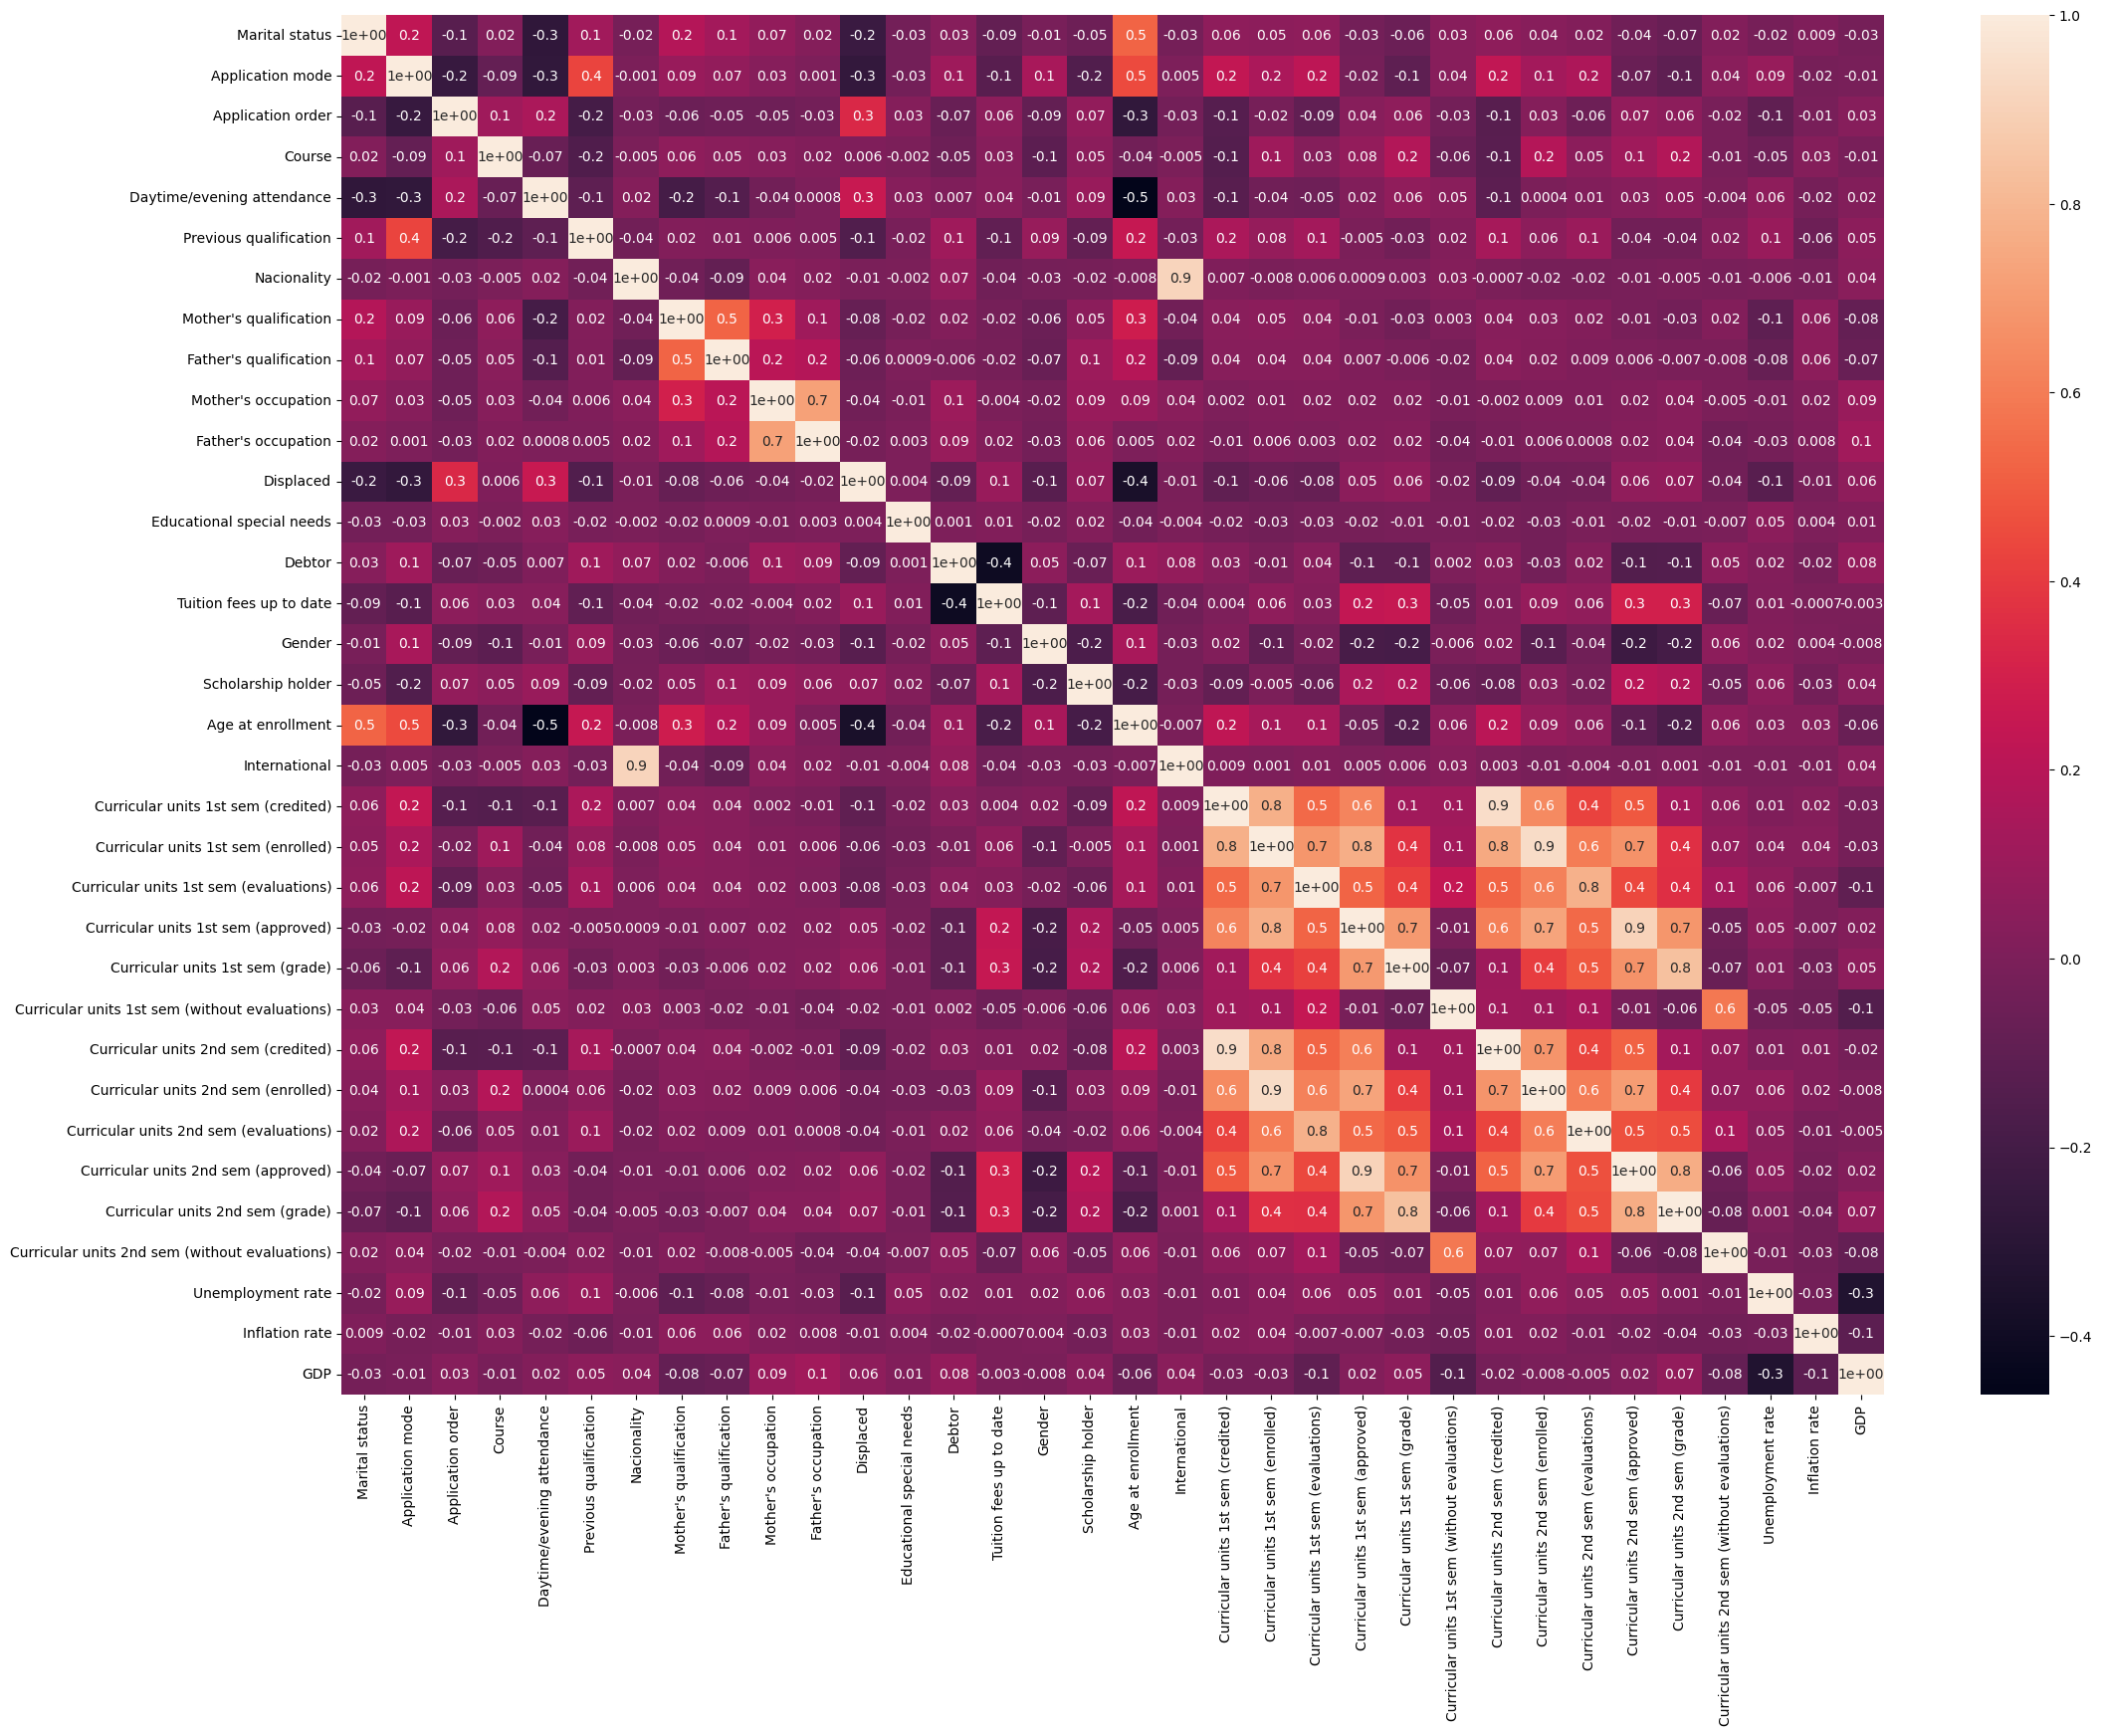

In [10]:
fix,ax=plt.subplots(1,1,figsize=(25,18))
sns.heatmap(data.corr(),annot=True,ax=ax,fmt='0.1')

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


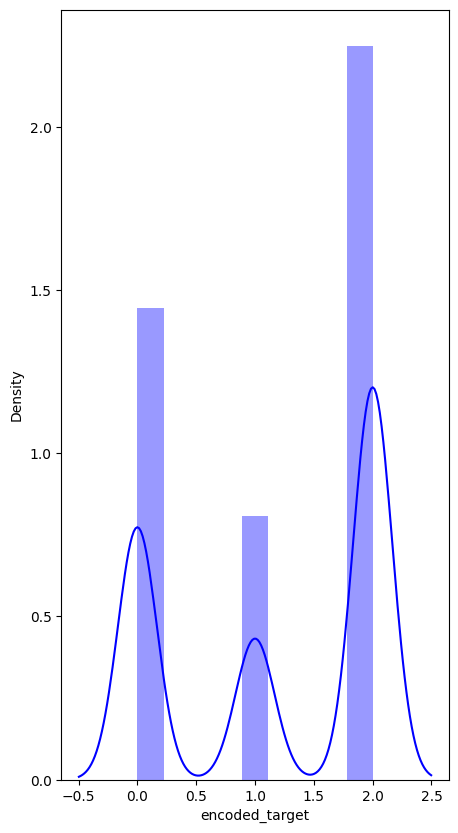

In [11]:
data['encoded_target'] = LabelEncoder().fit_transform(data['Target'])
plt.figure(figsize=(5, 10))
sns.distplot(data['encoded_target'], color = "Blue");

### Question

Does the balance matter here?

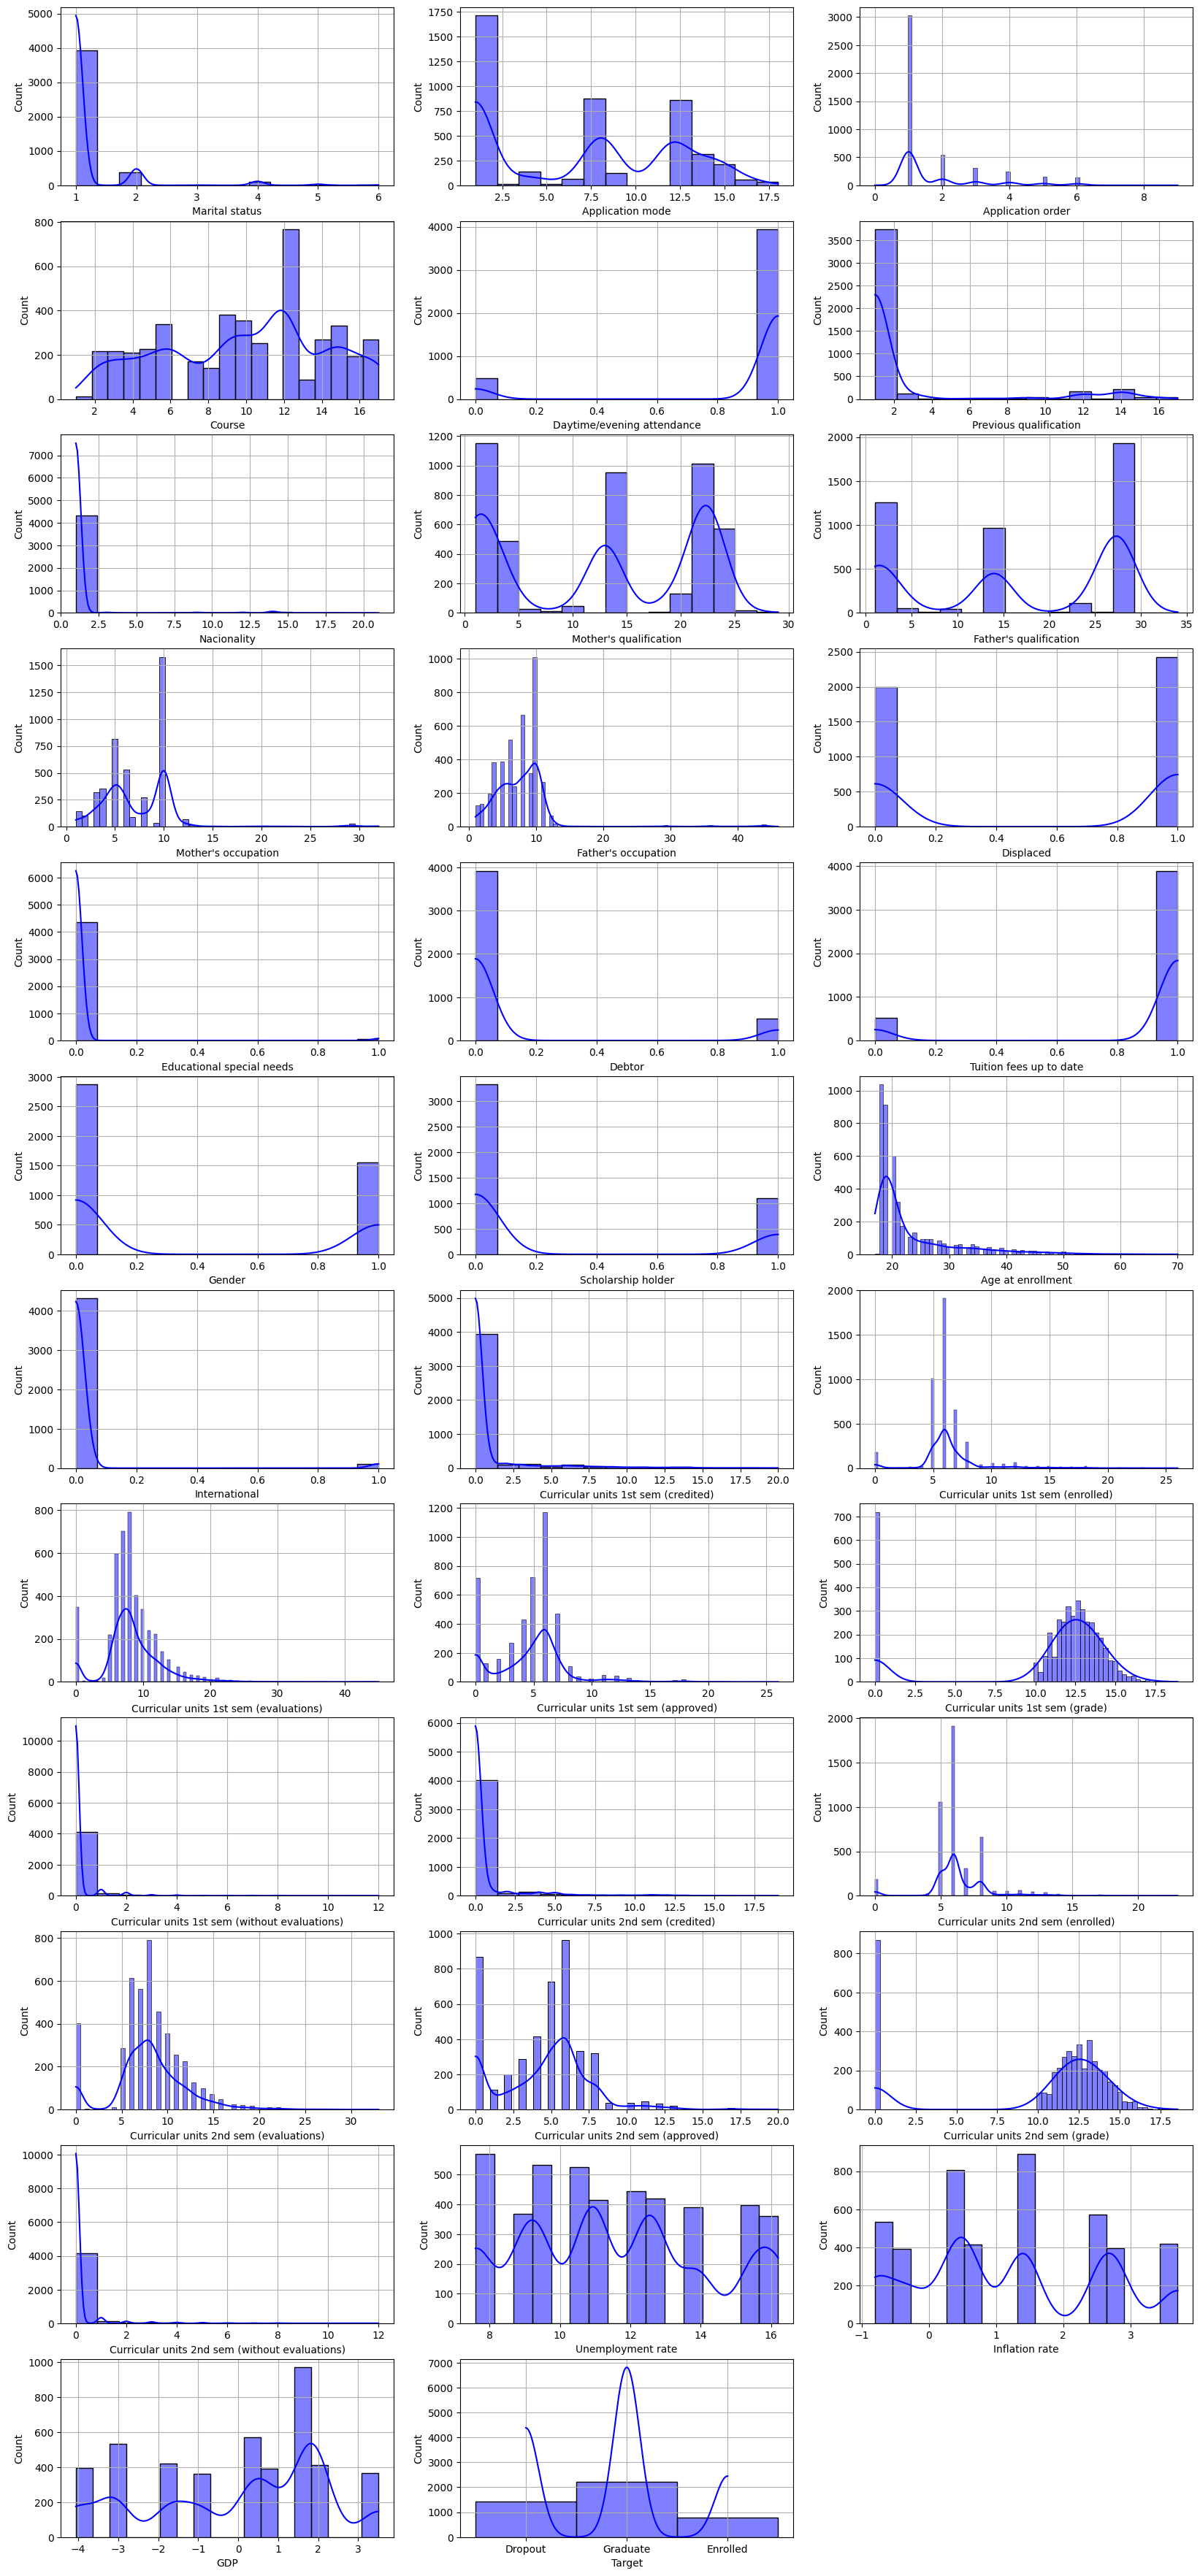

In [12]:
plt.figure(figsize=(20, 45));

for i in range(0, 35):
    plt.subplot(12,3,i+1)
    sns.histplot(data.iloc[:, i], color='blue', kde=True)
    plt.grid();

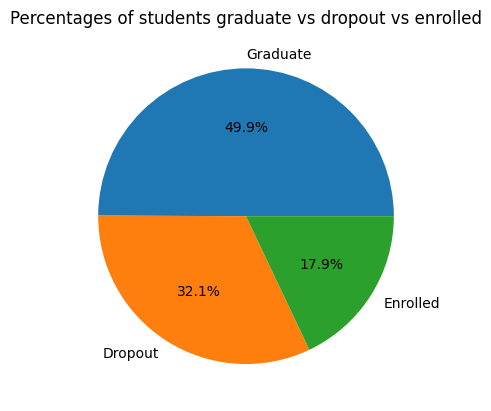

In [13]:
#percentages of students graduate vs dropout vs enrolled
st_summary = data['Target'].value_counts()

plt.pie(st_summary, labels=st_summary.index, autopct='%1.1f%%')
plt.title('Percentages of students graduate vs dropout vs enrolled')
plt.show()

## Data Analysis

### Demographics

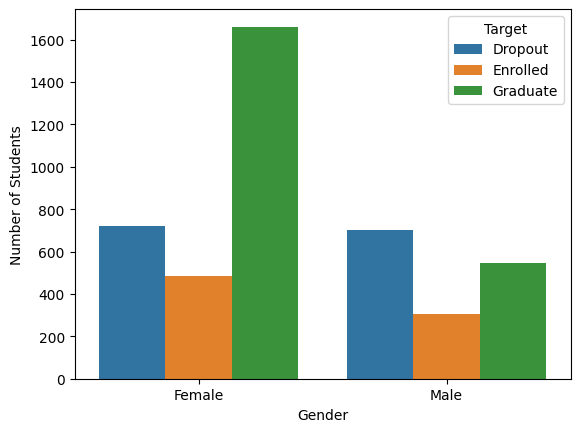

In [14]:
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

There's a higher number of female dropouts

### Marital Status

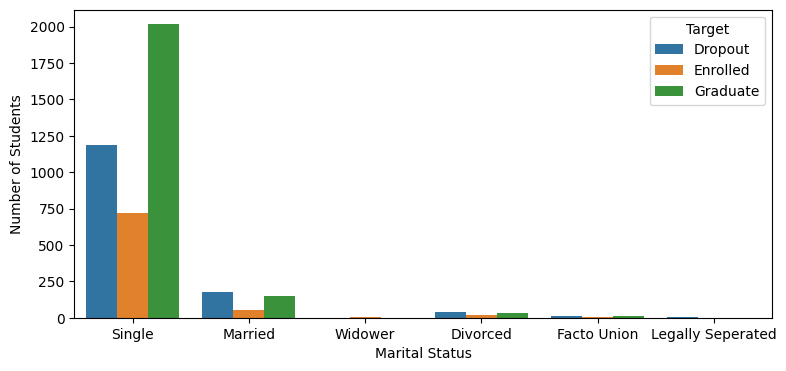

In [15]:
plt.figure(figsize=(9,4))

sns.countplot(data=data, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

### Student Course

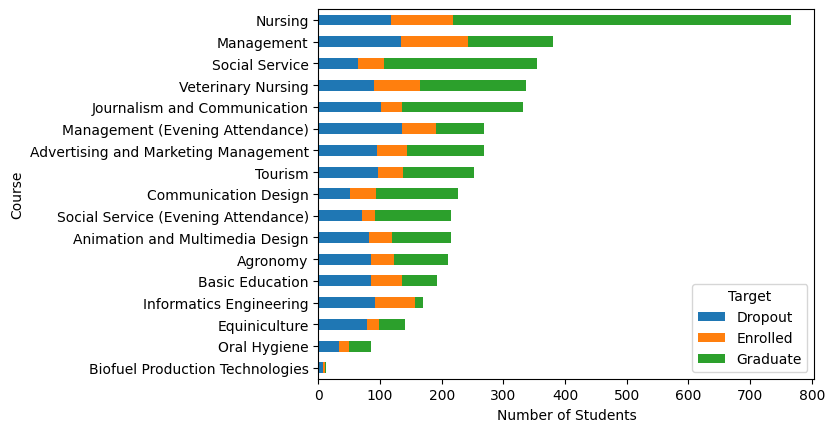

In [16]:
student_course = data.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Rename the index of the DataFrame
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

### Nationality

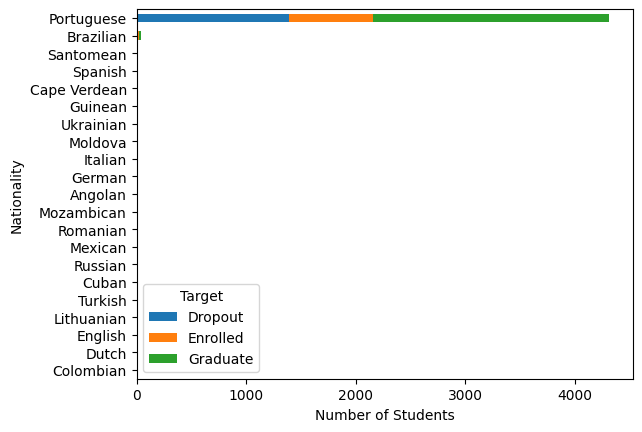

In [17]:
student_nationality = data.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target', index='Nacionality', values=0)

# Rename the index of the DataFrame
student_nationality = student_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

student_nationality_total = student_nationality.sum(axis=1)
student_nationality_sorted = student_nationality_total.sort_values(ascending=True)
student_nationality.loc[student_nationality_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()

### Displaced?

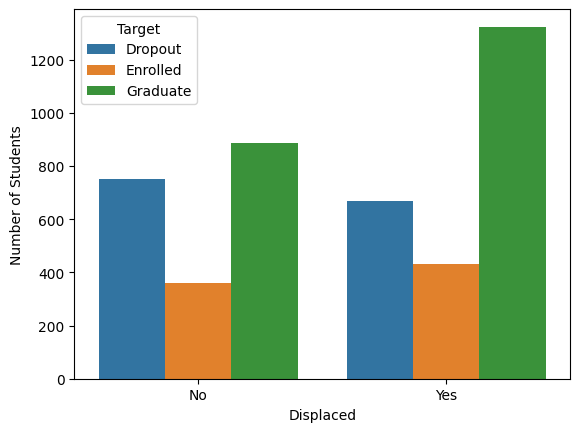

In [18]:
sns.countplot(data=data, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

### Age

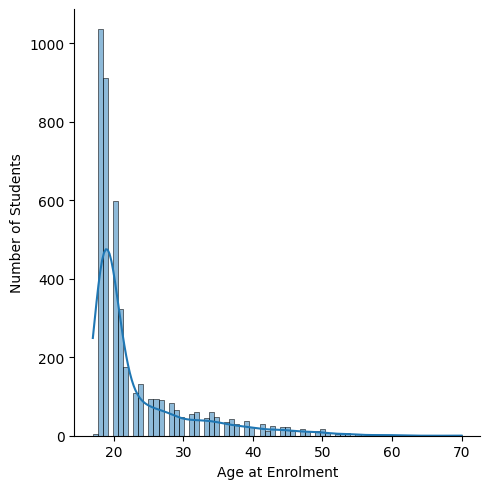

In [19]:
sns.displot(data=data, x='Age at enrollment', kde=True)
data['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

### Socioeconomic Status

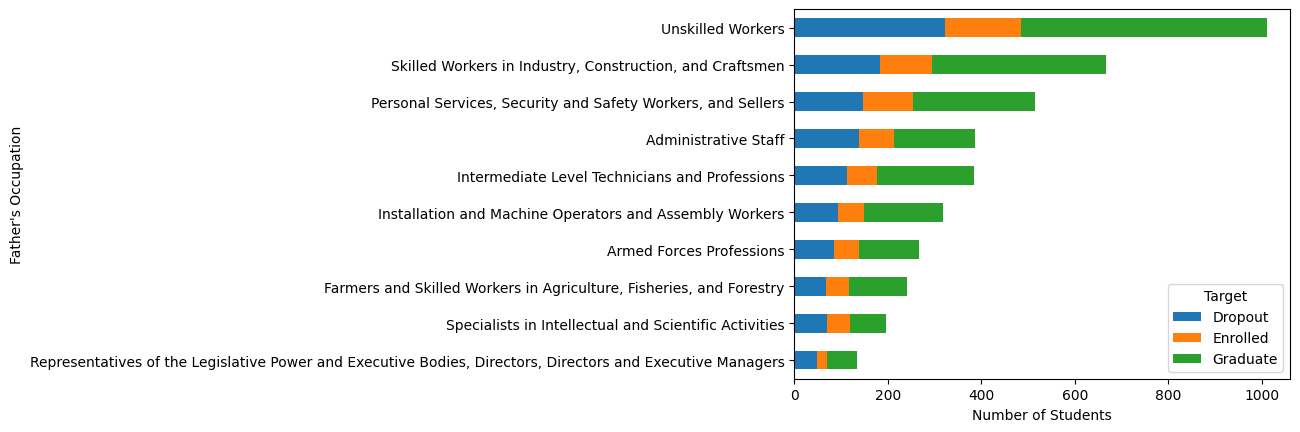

In [20]:
student_foccupation = data.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Father's occupation", values=0)

student_foccupation = student_foccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_foccupation_total = student_foccupation.sum(axis=1)
student_foccupation_sorted = student_foccupation_total.sort_values(ascending=True)
student_foccupation_top10 = student_foccupation_sorted[36:]
student_foccupation.loc[student_foccupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Father's Occupation")
plt.show()

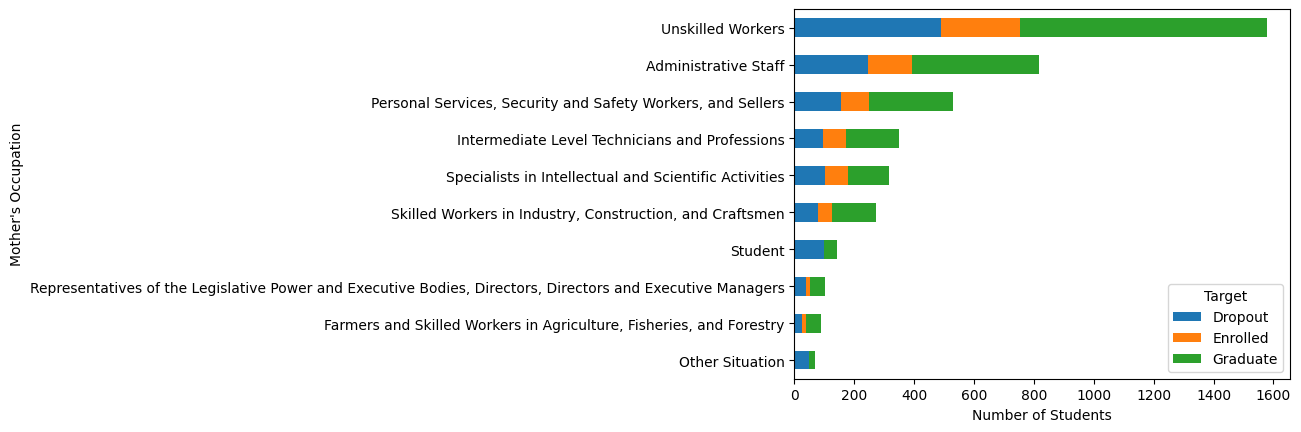

In [21]:
student_moccupation = data.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)

student_moccupation = student_moccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_moccupation_total = student_moccupation.sum(axis=1)
student_moccupation_sorted = student_moccupation_total.sort_values(ascending=True)
student_moccupation_top10 = student_moccupation_sorted[22:]
student_moccupation.loc[student_moccupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Mother's Occupation")
plt.show()

### Special needs

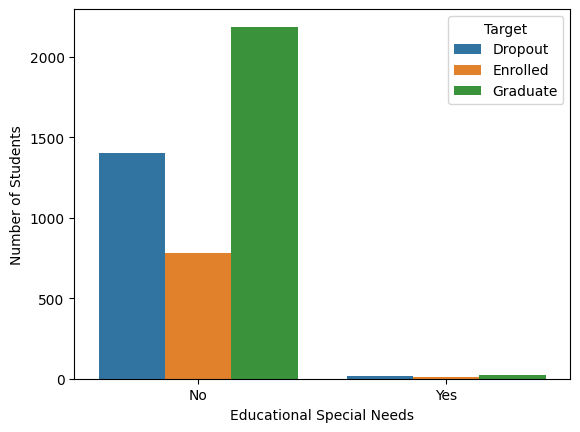

In [22]:
sns.countplot(data=data, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()

### Scholarship model

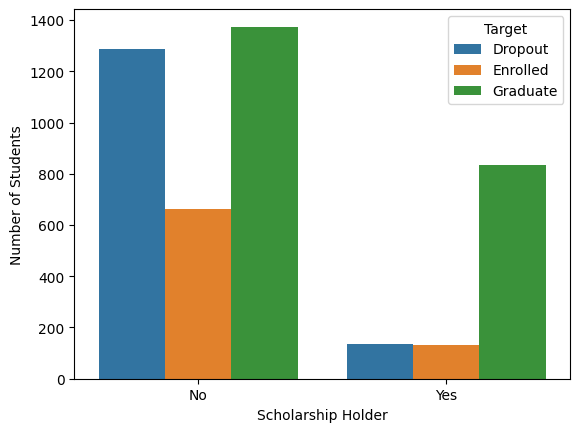

In [23]:
sns.countplot(data=data, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

### Previous Qualification

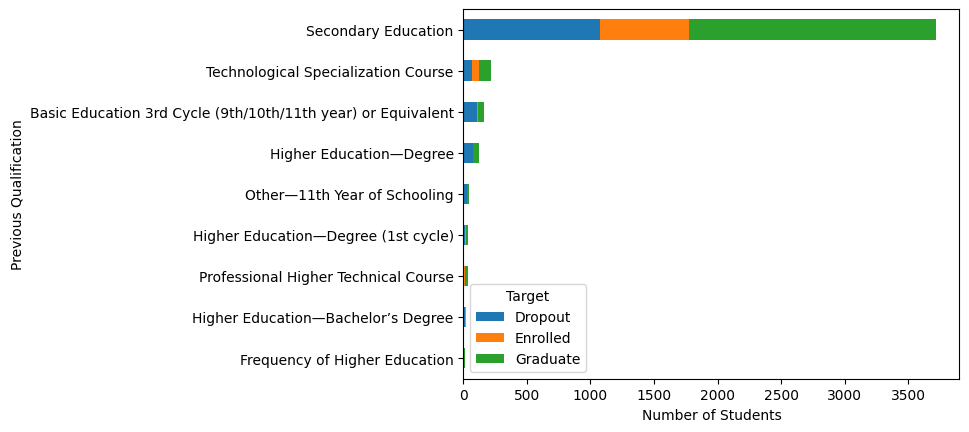

In [24]:
student_prequal = data.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns='Target', index='Previous qualification', values=0)

# Rename the index of the DataFrame
student_prequal = student_prequal.rename(index={1:'Secondary Education',2:'Higher Education—Bachelor’s Degree',3:'Higher Education—Degree',4:'Higher Education—Master’s Degree',5:'Higher Education—Doctorate',6:'Frequency of Higher Education',7:'12th Year of Schooling—Not Completed',8:'11th Year of Schooling—Not Completed',9:'Other—11th Year of Schooling',10:'10th Year of Schooling',11:'10th Year of Schooling—Not Completed',12:'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent',13:'Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent',14:'Technological Specialization Course',15:'Higher Education—Degree (1st cycle)',16:'Professional Higher Technical Course',17:'Higher Education—Master’s Degree (2nd Cycle)'})

student_prequal_total = student_prequal.sum(axis=1)
student_prequal_sorted = student_prequal_total.sort_values(ascending=True)
student_prequal_top = student_prequal_sorted[8:]
student_prequal.loc[student_prequal_top.index].plot(kind='barh', stacked=True)

plt.xlabel('Count')
plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.show()

### Macroeconomic

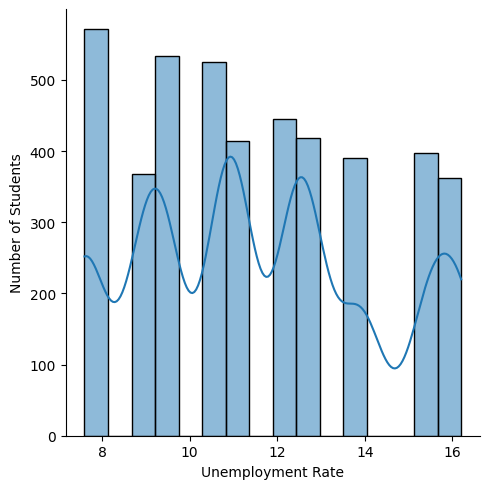

In [25]:
sns.displot(data=data, x="Unemployment rate", kde=True)
data['Unemployment rate'].describe()

plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Students')
plt.show()

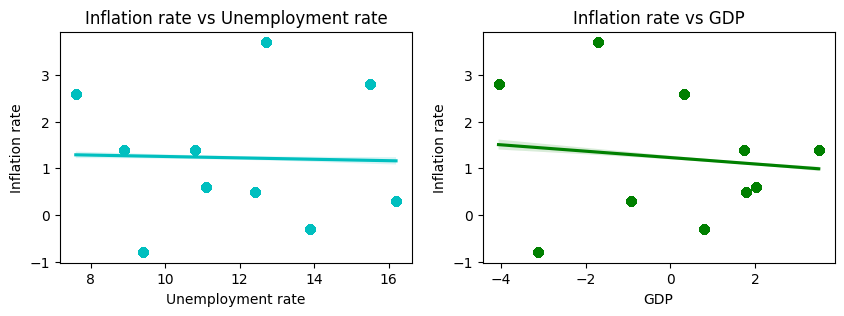

In [26]:
#regression analysis for GDP VS Unemployment rate and Inflation rate
###ploting the regression
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

# Plot the first regression line on the first subplot
sns.regplot(data=data, y="Inflation rate", x="Unemployment rate", color="c", ax=ax1)

# Plot the second regression line on the second subplot
sns.regplot(data=data, y="Inflation rate", x="GDP", color="g", ax=ax2)

# Set titles for each subplot
ax1.set_title("Inflation rate vs Unemployment rate")
ax2.set_title("Inflation rate vs GDP")

# Show the plot
plt.show()

# Data modelling

In [27]:
data.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [28]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,encoded_target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


In [29]:
data = data.drop(columns="encoded_target")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [30]:
data['Target'] = LabelEncoder().fit_transform(data['Target'])
data["Target"].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [31]:
# Drop all enrolled students, we only care if they dropout or not
# Dropout == 1, means yes the dropout
data = data.drop(data[data["Target"] == 1].index)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [32]:
data.shape

(3630, 35)

In [33]:
data['Dropout'] = data['Target'].apply(lambda x: 1 if x==0 else 0)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0


In [34]:
data = data.drop(columns=["Target"])
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [35]:
y = data["Dropout"]
X = data.drop(columns=["Dropout"])
X.shape, y.shape

((3630, 34), (3630,))

### Function to measure performance

In [36]:
def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_true, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred, average = 'micro'))
    cm = confusion_matrix(y_true, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_true, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

### Train-test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2541, 34), (1089, 34), (2541,), (1089,))

### Feature Scaling

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled

array([[-0.30428114,  0.22969756,  0.19594229, ...,  1.6888134 ,
        -0.65016508, -0.38227139],
       [-0.30428114, -1.09766776,  0.19594229, ..., -0.83572799,
        -1.43915324, -1.35516191],
       [-0.30428114, -1.09766776,  0.19594229, ...,  0.27804027,
        -0.50671269,  0.81615286],
       ...,
       [-0.30428114, -1.09766776,  0.19594229, ..., -1.02135603,
         0.13882308,  1.57677636],
       [-0.30428114, -1.09766776, -0.5527635 , ..., -1.50398894,
         0.99953743,  0.16608509],
       [-0.30428114, -1.09766776,  0.19594229, ..., -0.83572799,
        -1.43915324, -1.35516191]])

### Gaussian Naive Bayes

In [40]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [41]:
y_pred_nb = model_nb.predict(X_test_scaled)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

Precision :  0.8494031221303948
Recall :  0.8494031221303948
Accuracy :  0.8494031221303948
F1 Score :  0.8494031221303949

 [[627  65]
 [ 99 298]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       692
           1       0.82      0.75      0.78       397

    accuracy                           0.85      1089
   macro avg       0.84      0.83      0.83      1089
weighted avg       0.85      0.85      0.85      1089

******************************************************



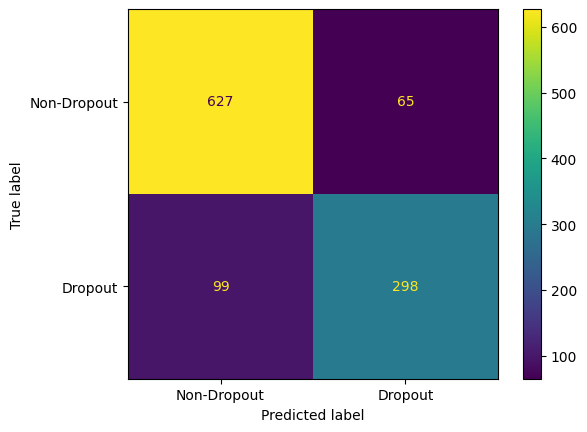

In [42]:
perform(y_test, y_pred_nb)

### Logistic Regression

In [43]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

Precision :  0.9256198347107438
Recall :  0.9256198347107438
Accuracy :  0.9256198347107438
F1 Score :  0.9256198347107438

 [[671  21]
 [ 60 337]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       692
           1       0.94      0.85      0.89       397

    accuracy                           0.93      1089
   macro avg       0.93      0.91      0.92      1089
weighted avg       0.93      0.93      0.92      1089

******************************************************



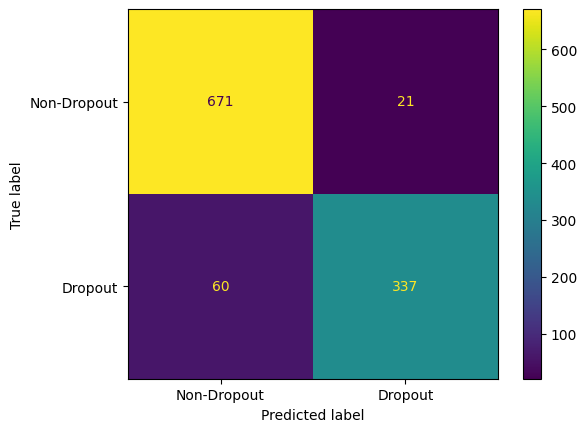

In [45]:
perform(y_test, y_pred_lr)

### Random Forest Classifier

In [46]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [47]:
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

Precision :  0.9155188246097337
Recall :  0.9155188246097337
Accuracy :  0.9155188246097337
F1 Score :  0.9155188246097337

 [[662  30]
 [ 62 335]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       692
           1       0.92      0.84      0.88       397

    accuracy                           0.92      1089
   macro avg       0.92      0.90      0.91      1089
weighted avg       0.92      0.92      0.91      1089

******************************************************



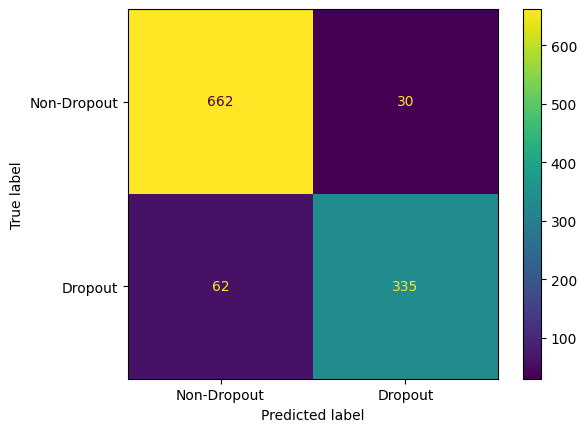

In [48]:
perform(y_test, y_pred_rf)

### XGBoost Classifier

In [49]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [50]:
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

Precision :  0.9044995408631772
Recall :  0.9044995408631772
Accuracy :  0.9044995408631772
F1 Score :  0.9044995408631772

 [[647  45]
 [ 59 338]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       692
           1       0.88      0.85      0.87       397

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089

******************************************************



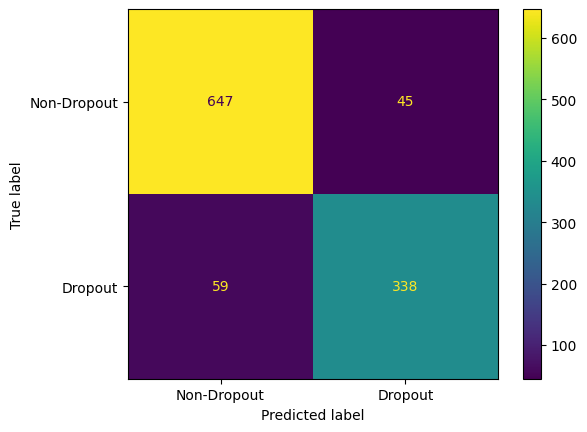

In [51]:
perform(y_test, y_pred_xgb)

### Support Vector Classifier

In [52]:
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

SVC()

In [53]:
y_pred_svc = model_svc.predict(X_test_scaled)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0])

Precision :  0.921028466483012
Recall :  0.921028466483012
Accuracy :  0.921028466483012
F1 Score :  0.921028466483012

 [[677  15]
 [ 71 326]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       692
           1       0.96      0.82      0.88       397

    accuracy                           0.92      1089
   macro avg       0.93      0.90      0.91      1089
weighted avg       0.92      0.92      0.92      1089

******************************************************



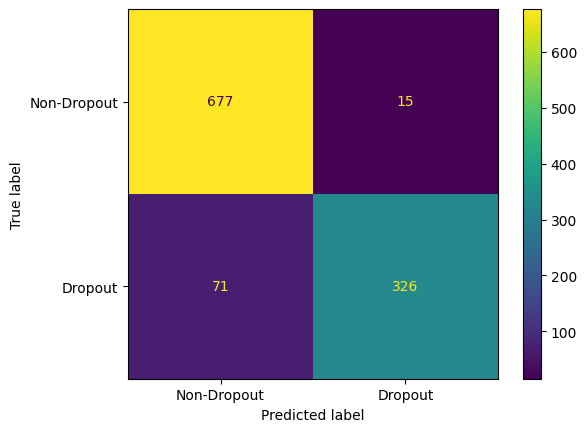

In [54]:
perform(y_test, y_pred_svc)

### Multi-layer Perceptron

In [55]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train_scaled, y_train)

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [56]:
y_pred_mlp = model_mlp.predict(X_test_scaled)
y_pred_mlp

array([0, 0, 0, ..., 0, 0, 0])

Precision :  0.9035812672176309
Recall :  0.9035812672176309
Accuracy :  0.9035812672176309
F1 Score :  0.9035812672176309

 [[651  41]
 [ 64 333]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       692
           1       0.89      0.84      0.86       397

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.89      1089
weighted avg       0.90      0.90      0.90      1089

******************************************************



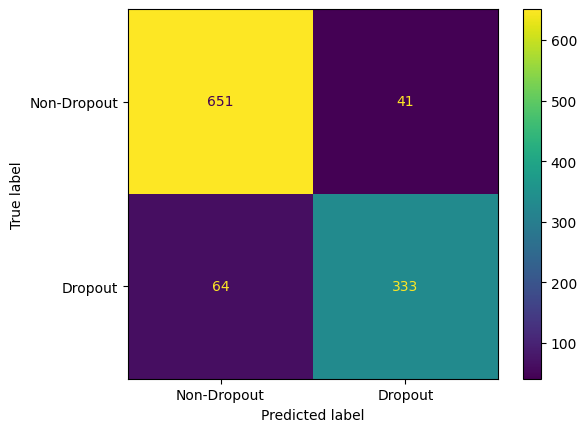

In [57]:
perform(y_test, y_pred_mlp)

### KNeighbors Classifier

In [58]:
model_kn = KNeighborsClassifier(n_neighbors=8, weights='distance')
model_kn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [59]:
y_pred_kn = model_kn.predict(X_test_scaled)
y_pred_kn

array([0, 0, 0, ..., 0, 0, 0])

Precision :  0.8732782369146006
Recall :  0.8732782369146006
Accuracy :  0.8732782369146006
F1 Score :  0.8732782369146006

 [[667  25]
 [113 284]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       692
           1       0.92      0.72      0.80       397

    accuracy                           0.87      1089
   macro avg       0.89      0.84      0.86      1089
weighted avg       0.88      0.87      0.87      1089

******************************************************



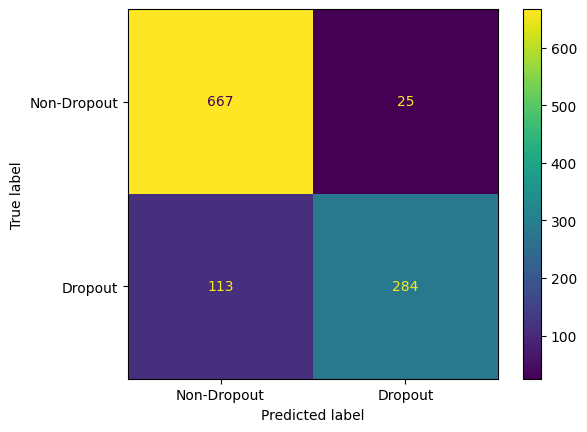

In [60]:
perform(y_test, y_pred_kn)



### Precision Recall Curve

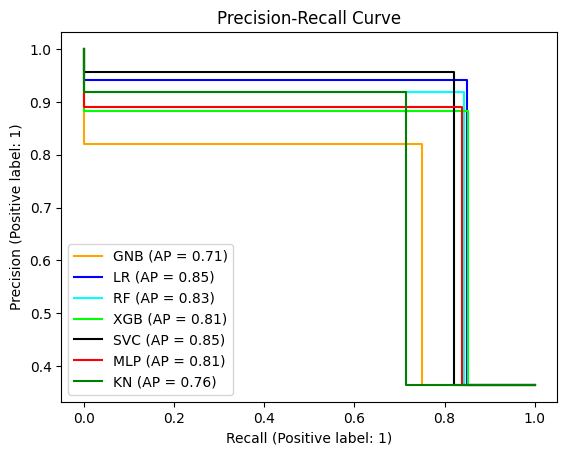

In [61]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LR", color='blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, ax = ax, name = "XGB", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='black')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mlp, ax = ax, name = "MLP", color='red')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_kn, ax = ax, name = "KN", color='green')

### ROC Curve

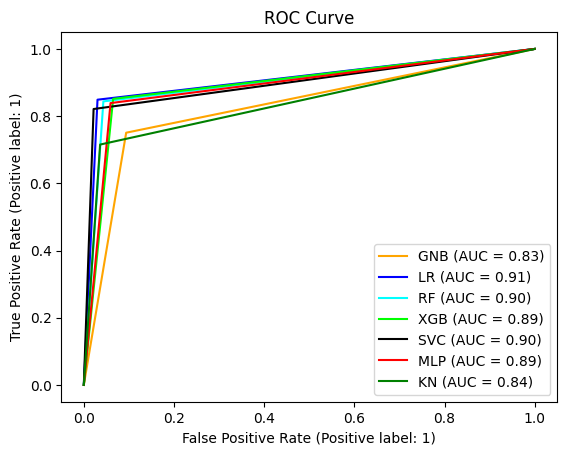

In [62]:
fig, ax = plt.subplots()
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
RocCurveDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LR", color='blue')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, ax = ax, name = "XGB", color='lime')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='black')
RocCurveDisplay.from_predictions(y_test, y_pred_mlp, ax = ax, name = "MLP", color='red')
RocCurveDisplay.from_predictions(y_test, y_pred_kn, ax = ax, name = "KN", color='green')

# Sources

1. [Main source](https://www.mdpi.com/2306-5729/7/11/146)
2. [Kaggle Dataset](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?resource=download&select=dataset.csv&fbclid=IwAR3RPDPw4t7HnG4FgpfERtUFDmbqARaJD6HuVtJr4O6W3cZmMtE4YKtGHaQ)